In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Read 0M words
Number of words:  54866
Number of labels: 5
Progress: 100.0% words/sec/thread:  771696 lr:  0.000000 avg.loss:  0.073306 ETA:   0h 0m 0s



📊 Validation Performance:
Validation Samples: 2433
Validation Accuracy: 0.7057
Validation F1-score: 0.7057

✅ Test Set Results
---------------------------
Accuracy     : 0.7173
Weighted F1  : 0.6925

Detailed Classification Report:
              precision    recall  f1-score   support

       angry      0.667     0.158     0.255        38
        fear      1.000     0.083     0.154        12
       happy      0.672     0.400     0.502       400
          no      0.731     0.916     0.813      1472
         sad      0.674     0.449     0.539       512

    accuracy                          0.717      2434
   macro avg      0.749     0.401     0.453      2434
weighted avg      0.710     0.717     0.693      2434



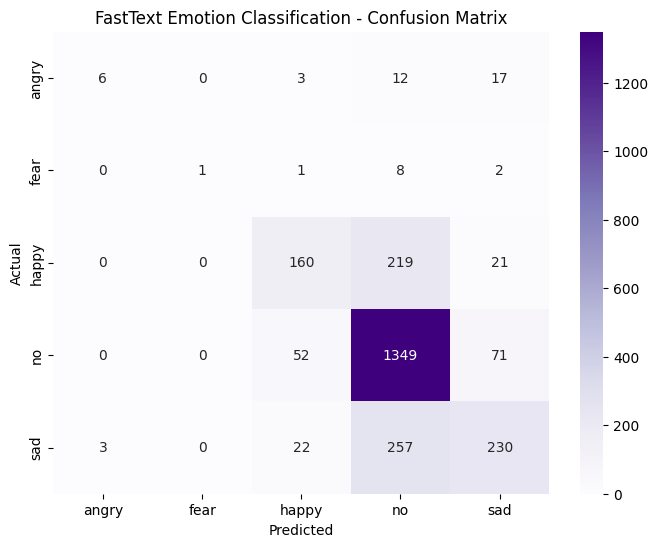


💾 Model saved as fasttext_telugu_emotion_model.bin


In [6]:
# =============================
# FastText - Telugu Emotion Classification
# =============================

!pip install -q fasttext scikit-learn pandas matplotlib seaborn

import fasttext
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

# -----------------------------
# 1. Paths
# -----------------------------
train_path = "/kaggle/input/nlpdataset1/train.csv"
val_path = "/kaggle/input/nlpdataset1/val.csv"
test_path = "/kaggle/input/nlpdataset1/test.csv"

# -----------------------------
# 2. Load Datasets
# -----------------------------
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# Ensure consistent column names
train_df.columns = [c.lower() for c in train_df.columns]
val_df.columns = [c.lower() for c in val_df.columns]
test_df.columns = [c.lower() for c in test_df.columns]

text_col = "sentence" if "sentence" in train_df.columns else "text"
label_col = "emotion" if "emotion" in train_df.columns else "label"

# -----------------------------
# 3. Prepare Data for FastText
# -----------------------------
def save_fasttext_format(df, filename):
    with open(filename, "w", encoding="utf-8") as f:
        for text, label in zip(df[text_col], df[label_col]):
            f.write(f"__label__{label} {text}\n")

save_fasttext_format(train_df, "train_fasttext.txt")
save_fasttext_format(val_df, "val_fasttext.txt")
save_fasttext_format(test_df, "test_fasttext.txt")

# -----------------------------
# 4. Train FastText Model
# -----------------------------
model = fasttext.train_supervised(
    input="train_fasttext.txt",
    epoch=30,
    lr=0.5,
    wordNgrams=2,
    verbose=2,
    minCount=1,
    loss="softmax"
)

# -----------------------------
# 5. Validate Model
# -----------------------------
print("\n📊 Validation Performance:")
val_result = model.test("val_fasttext.txt")
print(f"Validation Samples: {val_result[0]}")
print(f"Validation Accuracy: {val_result[1]:.4f}")
print(f"Validation F1-score: {val_result[2]:.4f}")

# -----------------------------
# 6. Evaluate on Test Set (Fixed)
# -----------------------------
test_texts = test_df[text_col].astype(str).tolist()
true_labels = test_df[label_col].astype(str).tolist()

pred_labels = []
for t in test_texts:
    clean_text = t.replace("\n", " ").replace("\r", " ").strip()
    label = model.predict(clean_text)[0][0]
    pred_labels.append(label.replace("__label__", ""))

# -----------------------------
# 7. Compute Metrics
# -----------------------------
accuracy = accuracy_score(true_labels, pred_labels)
weighted_f1 = f1_score(true_labels, pred_labels, average="weighted")

print("\n✅ Test Set Results")
print("---------------------------")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Weighted F1  : {weighted_f1:.4f}")

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(true_labels, pred_labels, digits=3))

# -----------------------------
# 8. Confusion Matrix
# -----------------------------
labels = sorted(list(set(true_labels)))
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("FastText Emotion Classification - Confusion Matrix")
plt.show()

# -----------------------------
# 9. Save Model
# -----------------------------
model.save_model("fasttext_telugu_emotion_model.bin")
print("\n💾 Model saved as fasttext_telugu_emotion_model.bin")


✅ Using FastText model from: cc.te.300.bin
✅ Telugu FastText model loaded successfully!

✅ Number of classes: 5
Loading XLM-RoBERTa-base model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

✅ XLM-RoBERTa loaded successfully!

Extracting fused embeddings (FastText + XLM-RoBERTa)... this may take a while ⏳


100%|██████████| 2434/2434 [00:21<00:00, 113.13it/s]


✅ Embedding shapes — Train: (19464, 1068), Val: (2433, 1068), Test: (2434, 1068)
Epoch 1/10 - Loss: 1.6648 - Val Acc: 0.6046
Epoch 2/10 - Loss: 1.4202 - Val Acc: 0.6046
Epoch 3/10 - Loss: 1.2490 - Val Acc: 0.6046
Epoch 4/10 - Loss: 1.1538 - Val Acc: 0.6046
Epoch 5/10 - Loss: 1.1166 - Val Acc: 0.6046
Epoch 6/10 - Loss: 1.0976 - Val Acc: 0.6046
Epoch 7/10 - Loss: 1.0779 - Val Acc: 0.6046
Epoch 8/10 - Loss: 1.0549 - Val Acc: 0.6046
Epoch 9/10 - Loss: 1.0373 - Val Acc: 0.6046
Epoch 10/10 - Loss: 1.0329 - Val Acc: 0.6046

✅ Test Accuracy: 0.6048
✅ Weighted F1-score: 0.4558

Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00        38
        fear       0.00      0.00      0.00        12
       happy       0.00      0.00      0.00       400
          no       0.60      1.00      0.75      1472
         sad       0.00      0.00      0.00       512

    accuracy                           0.60      2434
   macro avg       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


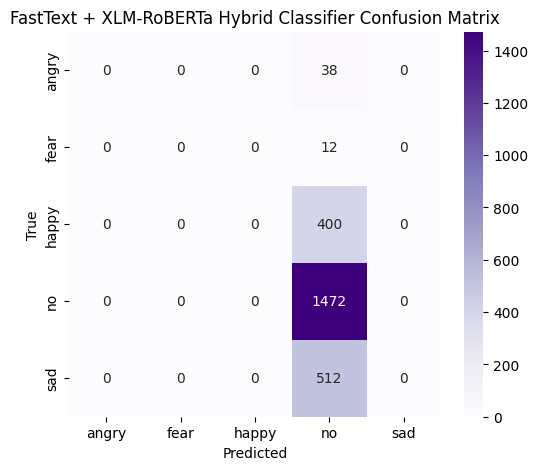

In [13]:
!pip install -q fasttext torch scikit-learn transformers pandas seaborn matplotlib tqdm

import os
import fasttext
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel

# -----------------------------------------------
# 0. Load Telugu FastText Model
# -----------------------------------------------
ft_path = "/kaggle/input/cc-te-300/cc.te.300.bin"
if not os.path.exists(ft_path):
    print("Downloading Telugu FastText embeddings (~4.5GB)...")
    !wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.te.300.bin.gz
    !gunzip cc.te.300.bin.gz
    ft_path = "cc.te.300.bin"

print(f"✅ Using FastText model from: {ft_path}")
ft_model = fasttext.load_model(ft_path)
print("✅ Telugu FastText model loaded successfully!\n")

# -----------------------------------------------
# 1. Load Dataset
# -----------------------------------------------
train_df = pd.read_csv("/kaggle/input/nlpdataset1/train.csv")
val_df   = pd.read_csv("/kaggle/input/nlpdataset1/val.csv")
test_df  = pd.read_csv("/kaggle/input/nlpdataset1/test.csv")

text_col = "Sentence"
label_col = "Emotion"

# -----------------------------------------------
# 2. Encode Labels
# -----------------------------------------------
le = LabelEncoder()
train_df[label_col] = le.fit_transform(train_df[label_col])
val_df[label_col]   = le.transform(val_df[label_col])
test_df[label_col]  = le.transform(test_df[label_col])
num_classes = len(le.classes_)
print(f"✅ Number of classes: {num_classes}")

# -----------------------------------------------
# 3. Load XLM-RoBERTa
# -----------------------------------------------
print("Loading XLM-RoBERTa-base model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
xlmr_model = AutoModel.from_pretrained("xlm-roberta-base")
xlmr_model.eval()
xlmr_model.to("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ XLM-RoBERTa loaded successfully!\n")

# -----------------------------------------------
# 4. Functions to Extract Embeddings
# -----------------------------------------------
def get_fasttext_vec(text):
    clean = str(text).replace("\n", " ").replace("\r", " ").strip()
    return ft_model.get_sentence_vector(clean)

def get_xlmr_vec(text):
    tokens = tokenizer(str(text), return_tensors="pt", truncation=True, padding=True, max_length=64)
    tokens = {k: v.to(device) for k, v in tokens.items()}
    with torch.no_grad():
        outputs = xlmr_model(**tokens)
    cls_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy().flatten()
    return cls_emb

def get_fused_vector(text):
    ft_vec = get_fasttext_vec(text)
    xlmr_vec = get_xlmr_vec(text)
    return np.concatenate([ft_vec, xlmr_vec])

# -----------------------------------------------
# 5. Create Embedding Matrices
# -----------------------------------------------
print("Extracting fused embeddings (FastText + XLM-RoBERTa)... this may take a while ⏳")

train_vectors = np.vstack([get_fused_vector(t) for t in tqdm(train_df[text_col])])
val_vectors   = np.vstack([get_fused_vector(t) for t in tqdm(val_df[text_col])])
test_vectors  = np.vstack([get_fused_vector(t) for t in tqdm(test_df[text_col])])

y_train = train_df[label_col].values
y_val   = val_df[label_col].values
y_test  = test_df[label_col].values

print(f"✅ Embedding shapes — Train: {train_vectors.shape}, Val: {val_vectors.shape}, Test: {test_vectors.shape}")

# -----------------------------------------------
# 6. Classifier Model
# -----------------------------------------------
class FusionClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x):
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

input_dim = train_vectors.shape[1]  # 1068 = 300 + 768
model = FusionClassifier(input_dim=input_dim, hidden_dim=512, num_classes=num_classes).to(device)

# -----------------------------------------------
# 7. Training Loop
# -----------------------------------------------
X_train = torch.tensor(train_vectors, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
X_val   = torch.tensor(val_vectors, dtype=torch.float32).to(device)
y_val   = torch.tensor(y_val, dtype=torch.long).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train)
    loss = criterion(logits, y_train)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val)
        val_preds = torch.argmax(val_logits, dim=1)
        val_acc = accuracy_score(y_val.cpu(), val_preds.cpu())
    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f} - Val Acc: {val_acc:.4f}")

# -----------------------------------------------
# 8. Test Evaluation
# -----------------------------------------------
model.eval()
X_test = torch.tensor(test_vectors, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test, dtype=torch.long).to(device)

with torch.no_grad():
    logits = model(X_test)
    preds = torch.argmax(logits, dim=1)

acc = accuracy_score(y_test, preds.cpu())
f1 = f1_score(y_test, preds.cpu(), average='weighted')
print(f"\n✅ Test Accuracy: {acc:.4f}")
print(f"✅ Weighted F1-score: {f1:.4f}")

# -----------------------------------------------
# 9. Classification Report + Confusion Matrix
# -----------------------------------------------
report = classification_report(y_test, preds.cpu(), target_names=le.classes_)
print("\nClassification Report:\n", report)

cm = confusion_matrix(y_test, preds.cpu())
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("FastText + XLM-RoBERTa Hybrid Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [8]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nlpdataset1/val.csv
/kaggle/input/nlpdataset1/train.csv
/kaggle/input/nlpdataset1/test.csv


In [12]:
!rm -rf /kaggle/working/cc.te.300.bin.gz.1

In [11]:
!gunzip -k /kaggle/working/cc.te.300.bin.gz.1

gzip: /kaggle/working/cc.te.300.bin.gz.1: unknown suffix -- ignored
